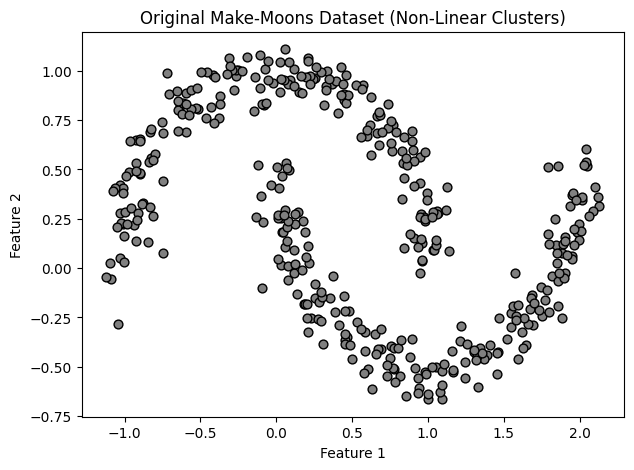

Number of clusters found: 2
Cluster label distribution:
 (array([-1,  0,  1]), array([  1, 200, 199]))


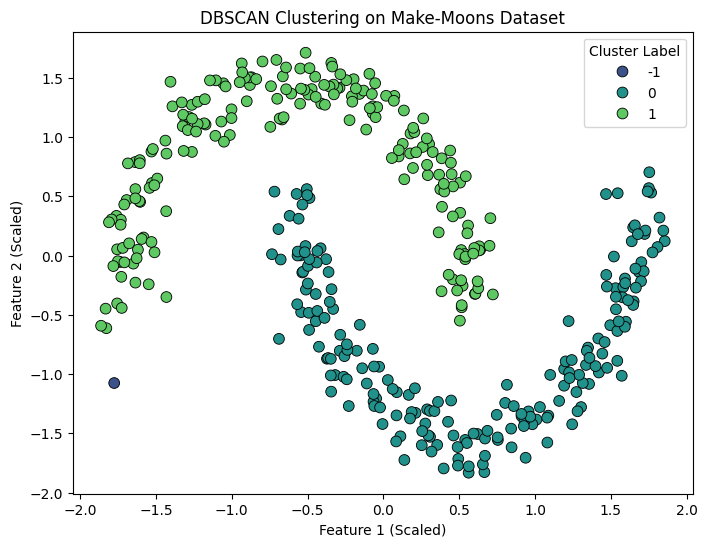

Silhouette Score (excluding noise): 0.376


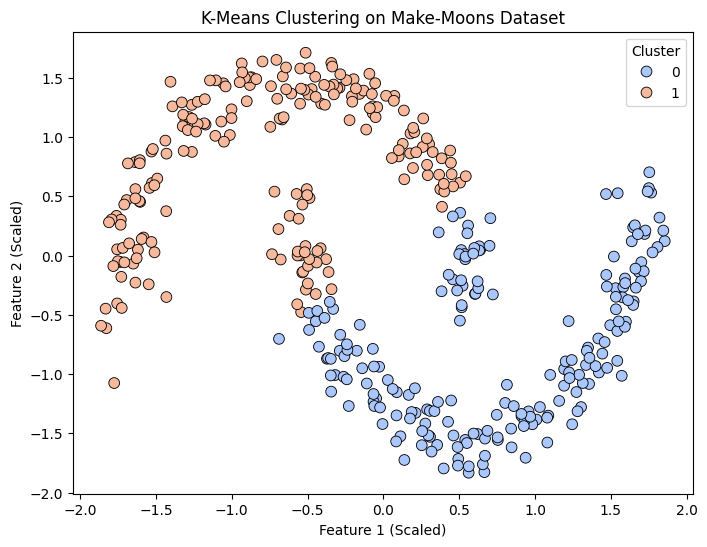

In [1]:
# 1. Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score

# 2. Generate the non-linear Make Moons dataset
X, y = make_moons(n_samples=400, noise=0.08, random_state=42)

# Visualize the raw data
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c='gray', s=40, edgecolor='k')
plt.title("Original Make-Moons Dataset (Non-Linear Clusters)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# 3. Standardize the data for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# Count clusters (-1 represents noise)
unique_labels = set(clusters)
n_clusters = len(unique_labels) - (1 if -1 in clusters else 0)
print(f"Number of clusters found: {n_clusters}")
print("Cluster label distribution:\n", np.unique(clusters, return_counts=True))

# 5. Visualize DBSCAN clusters
plt.figure(figsize=(8, 6))
palette = sns.color_palette("viridis", len(unique_labels))
sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1],
    hue=clusters, palette=palette, s=60, edgecolor='k'
)
plt.title("DBSCAN Clustering on Make-Moons Dataset")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend(title="Cluster Label", loc='best')
plt.show()

# 6. Evaluate clustering quality (ignoring noise points)
mask = clusters != -1
if len(set(clusters[mask])) > 1:
    score = silhouette_score(X_scaled[mask], clusters[mask])
    print(f"Silhouette Score (excluding noise): {score:.3f}")
else:
    print("Not enough clusters to compute Silhouette Score.")

# 7. Compare with K-Means for reference
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans_labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_scaled[:, 0], y=X_scaled[:, 1],
    hue=kmeans_labels, palette='coolwarm', s=60, edgecolor='k'
)
plt.title("K-Means Clustering on Make-Moons Dataset")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend(title="Cluster")
plt.show()
